1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
def convert(n):
    nbin = bin(n)
    nhex = hex(n)
    ndec = int(nbin,2)
    print('Binary:', nbin)
    print('Decimal:', ndec)
    print('Hexadecimal:', nhex)

convert(0b1001)

Binary: 0b1001
Decimal: 9
Hexadecimal: 0x9


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
#From string
def reader_32_bit(string):
    #check
    if len(string) != 32:
        print("Error: wrong bit number!!!", len(string))
        return 1
    if string[0] == '0':
        s = 1
    else:
        s = -1
    e = int(string[1:9],2)-127
    M = string[9:]
    m = 1
    for i in range(len(M)):
        m += int(M[i],10)*2**(-i-1)
    return s*m*2**e

a = '01000101010011010000100110011001'
print(reader_32_bit(a))

#From binary
def sign(n): 
    if n >> 31 == 0:
        s = 1
    else:
        s = 0
    return s

def exp(n):
    m = 0b01111111100000000000000000000000
    C = m & n
    return((C >> 23)-127)

def mant(n):
    m = 0b11111111111111111111111
    C = m & n
    M = 1
    for i in range(23):
        c = (C & 2**i) >> i
        M += c * 2**(-23+i)
    return M

def reader_32_bit_binary(n):
    s = sign(n)
    e = exp(n)
    M = mant(n)
    return s*M*2**e


n = 0b01000101010011010000100110011001
print(reader_32_bit_binary(n))

3280.599853515625
3280.599853515625


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer.

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits


In [1]:
a = 1.

while a-a==0:
    b = a
    a*=2
print(b)

a = 1.

while a != 0:
    b = a
    a /= 2

print(b)

8.98846567431158e+307
5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [4]:
a = 1
while a+1!=1:
    a/=2
print(a)

1.1102230246251565e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [5]:
def quad1(a,b,c):
    x1 = (-b-(b*b-4*a*c)**0.5)/(2*a)
    x2 = (-b+(b*b-4*a*c)**0.5)/(2*a)
    return x1, x2

def quad2(a,b,c):
    x1 = 2*c/(-b+(b*b-4*a*c)**0.5)
    x2 = 2*c/(-b-(b*b-4*a*c)**0.5)
    return x1, x2

X1, X2 = quad1(0.001,1000,0.001)
print('x1 = ',X1, 'x2 =', X2)
#X1 accurate, X2 not accurate

X1, X2 = quad2(0.001,1000,0.001)
print('x1 = ',X1, 'x2 =', X2)
#X1 not accurate, X2 accurate

def quad3(a,b,c):
    x1 = (-b-(b*b-4*a*c)**0.5)/(2*a)
    x2 = 2*c/(-b-(b*b-4*a*c)**0.5)
    return x1, x2
    
X1, X2 = quad3(0.001,1000,0.001)
print('x1 = ',X1, 'x2 =', X2)

"""The problems show off when we try to calculate the value -b+(b**2-4*a*c)**0.5 because it approaches to 0. Using the alternative function to calculate X2 we avoid this problem"""

x1 =  -999999.999999 x2 = -9.999894245993346e-07
x1 =  -1000010.5755125057 x2 = -1.000000000001e-06
x1 =  -999999.999999 x2 = -1.000000000001e-06


'The problems show off when we try to calculate the value -b+(b**2-4*a*c)**0.5 because it approaches to 0. Using the alternative function to calculate X2 we avoid this problem'

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

1.010000000000001


1.0000999999998899
1.0000009999177333
1.0000000039225287
1.000000082840371
1.0000889005833413
0.9992007221626509


Computed value for delta = 10e-14:  9.992007221626508e-15 differen from the true value: 1.00000000000001e-14


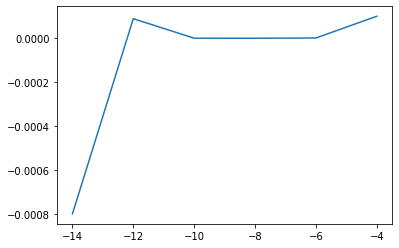

'Using delta = 10^(-2) the result does not coincide with the true value because the value of delta is still too big. Reducing it we can find more accurate results but when delta becomes too small (in our case for delta = 10^(-12) and 10^(-14)) the accuracy goes worst because we are dealing with small numbers. In particular the calculation of func() is not more accurate with such values'

In [2]:
import matplotlib.pyplot as plt

def func(x):
    return x*(x-1)

delta = 10**(-2)
df = (func(1+delta)-func(1))/delta
print(df)
print('\n')

l = [-4, -6, -8, -10, -12, -14]
m =[]
for i in l:
    delta = 10**i
    m.append((func(1+delta)-func(1))/delta - 1)
    print((func(1+delta)-func(1))/delta)

print('\n')
print("Computed value for delta = 10e-14: ", func(1+10**(-14)), "differen from the true value:", 1.00000000000001e-14)

#Print the difference from the true value
plt.plot(l, m)
plt.show()

"""Using delta = 10^(-2) the result does not coincide with the true value because the value of delta is still too big. Reducing it we can find more accurate results but when delta becomes too small (in our case for delta = 10^(-12) and 10^(-14)) the accuracy goes worse because we are making operations beetwen numbers of very different magnitude. In particular the calculation of func() is not more accurate with such values"""

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [7]:
import math

value = math.pi/2
print("true value = ", value)

def func(x):
    return (1-x**2)**0.5

def integral(N):
    h = 2/N
    l = [-1 + h/2 + i*h for i in range(N)]
    Y = [h*func(i) for i in l]
    return sum(Y)

#N = 100
N = 6*10**5
I = integral(N)
print("\nN = 100 computation: ", I)
#Difference from the true value
Delta = I - value
print("Delta = ", Delta)
print('\n')

#For loop to detect the time in function of N
l = [3,4,5,6]
for i in l:
    print(integral(10**i))
    %timeit integral(10**i)

#1 second computation
N = 12*10**5
I = integral(N)
print("\n1 s computation: ", I)
Delta = I - value
print("Delta = ", Delta)
%timeit integral(N)

#1 minute computation
N = 7*10**7
I = integral(N)
print("\n1 min computation: ", I)
Delta = I - value
print("Delta = ", Delta)
#ATTENTION: The calculation of the time requires a lot of time(approx. 7 min)
#%timeit integral(N)

true value =  1.5707963267948966

N = 100 computation:  1.5707963278430572
Delta =  1.0481606693701906e-09


1.5708117284099565
775 µs ± 31.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.5707968138960273
7.66 ms ± 439 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.5707963421985762
73.7 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.570796327282045
776 ms ± 20.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

1 s computation:  1.5707963271654952
Delta =  3.7059866286881515e-10
899 ms ± 3.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

1 min computation:  1.570796326795324
Delta =  4.2743586448068527e-13
